# Аушева Л.И. ИУ5-61Б, В-1

## Задача №1.
### Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

## Признаки

In [23]:
data = load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [24]:
X = data['data']
df_X = pd.DataFrame(X, columns=data.feature_names)
df_X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


## Целевой признак

In [28]:
y = data['target']
df_y = pd.DataFrame(y, columns=['MEDV'])
df_y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


## Пропущенные (нулевые) значения отсутствуют

In [17]:
df_X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

## Коэффициент корелляции Пирсона
### по уровню криминала

In [18]:
corr_matrix = df_X.corr()

In [29]:
corr_matrix['CRIM'].sort_values(ascending=False)

CRIM       1.000000
RAD        0.625505
TAX        0.582764
LSTAT      0.455621
NOX        0.420972
INDUS      0.406583
AGE        0.352734
PTRATIO    0.289946
CHAS      -0.055892
ZN        -0.200469
RM        -0.219247
DIS       -0.379670
B         -0.385064
Name: CRIM, dtype: float64

### Связан с 'ставка налога на полную стоимость имущества за 10 000 долл. США' и 'индекс доступности к радиальным магистралям'

# Построим модель KNeighborsRegressor

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [63]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
params = [{'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['distance', 'uniform'], 'p': [1, 2]}]
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid=params, cv=kf, n_jobs=-1)
grid_search.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                          'weights': ['distance', 'uniform']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

## Лучшая модель

In [104]:
clf = grid_search.best_estimator_
clf

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                    weights='distance')

In [105]:
cvs = cross_val_score(clf, X, y, cv=kf, scoring='neg_mean_squared_error')
cvs.mean()

-29.7872280754304

## Диаграмма рассеяния

In [113]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

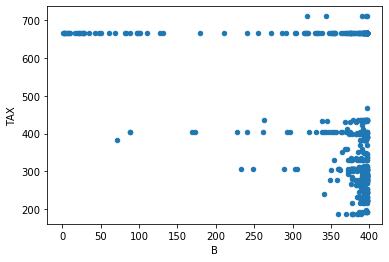

In [132]:
df_X.plot(kind='scatter', x='B', y='TAX')
plt.show()